In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df_in = pd.read_csv('Austin_Animal_Center_Intakes.csv')
df_in.head()

Animal ID      Name                DateTime     MonthYear  \
0   A665644       NaN  10/21/2013 07:59:00 AM  October 2013   
1   A665739    *Alana  10/22/2013 11:11:00 AM  October 2013   
2   A665763       NaN  10/22/2013 03:10:00 PM  October 2013   
3   A379998  Disciple  10/23/2013 11:42:00 AM  October 2013   
4   A634503     Otter  10/01/2013 02:49:00 PM  October 2013   

                                 Found Location      Intake Type  \
0                                   Austin (TX)            Stray   
1                                   Austin (TX)            Stray   
2  E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                51St And Grover in Austin (TX)            Stray   
4                                    Manor (TX)  Owner Surrender   

  Intake Condition Animal Type Sex upon Intake Age upon Intake  \
0             Sick         Cat   Intact Female         4 weeks   
1           Normal         Cat   Intact Female         1 month   
2           Normal         Dog     Intact Male        4 months   
3           Normal         Dog     Intact Male        10 years   
4           Normal         Dog   Spayed Female         2 years   

                      Breed      Color  
0    Domestic Shorthair Mix     Calico  
1  Domestic Medium Hair Mix      Black  
2         Cairn Terrier Mix  Tan/White  
3                  Pit Bull      Black  
4       Norfolk Terrier Mix        Tan

# Preparing the data

In [3]:
df_out = pd.read_csv('Austin_Animal_Center_Outcomes.csv')
df_out.head()

Animal ID   Name                DateTime MonthYear Date of Birth  \
0   A794011  Chunk  05/08/2019 06:20:00 PM  May 2019    05/02/2017   
1   A776359  Gizmo  07/18/2018 04:02:00 PM  Jul 2018    07/12/2017   
2   A821648    NaN  08/16/2020 11:38:00 AM  Aug 2020    08/16/2019   
3   A720371  Moose  02/13/2016 05:59:00 PM  Feb 2016    10/08/2015   
4   A674754    NaN  03/18/2014 11:47:00 AM  Mar 2014    03/12/2014   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0    Rto-Adopt             NaN         Cat    Neutered Male          2 years   
1     Adoption             NaN         Dog    Neutered Male           1 year   
2   Euthanasia             NaN       Other          Unknown           1 year   
3     Adoption             NaN         Dog    Neutered Male         4 months   
4     Transfer         Partner         Cat      Intact Male           6 days   

                                Breed              Color  
0              Domestic Shorthair Mix  Brown Tabby/White  
1             Chihuahua Shorthair Mix        White/Brown  
2                             Raccoon               Gray  
3  Anatol Shepherd/Labrador Retriever               Buff  
4              Domestic Shorthair Mix       Orange Tabby

In [4]:
df_out = df_out.convert_dtypes(infer_objects=True)
df_out['DateTime'] = pd.to_datetime(df_out['DateTime'])
df_out['Date of Birth'] = pd.to_datetime(df_out['Date of Birth'])
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         149511 non-null  string        
 1   Name              106260 non-null  string        
 2   DateTime          149511 non-null  datetime64[ns]
 3   MonthYear         149511 non-null  string        
 4   Date of Birth     149511 non-null  datetime64[ns]
 5   Outcome Type      149485 non-null  string        
 6   Outcome Subtype   68443 non-null   string        
 7   Animal Type       149511 non-null  string        
 8   Sex upon Outcome  149509 non-null  string        
 9   Age upon Outcome  149465 non-null  string        
 10  Breed             149511 non-null  string        
 11  Color             149511 non-null  string        
dtypes: datetime64[ns](2), string(10)
memory usage: 13.7 MB


## Colors

In [5]:
from math import pi

# colors.csv was compiled from these wikipedia articles
# https://en.wikipedia.org/wiki/List_of_colors:_A–F
# https://en.wikipedia.org/wiki/List_of_colors:_G%E2%80%93M
# https://en.wikipedia.org/wiki/List_of_colors:_N%E2%80%93Z
# Then the "—" character was replaced with "0"
df_colors = pd.read_csv('colors.csv')
df_colors = df_colors.convert_dtypes(infer_objects=True)
df_colors['Name'] = df_colors['Name'].str.lower()
df_colors['Red (RGB)'] = pd.to_numeric(df_colors['Red (RGB)'].str.replace('%', '')).div(100)
df_colors['Green (RGB)'] = pd.to_numeric(df_colors['Green (RGB)'].str.replace('%', '')).div(100)
df_colors['Blue (RGB)'] = pd.to_numeric(df_colors['Blue (RGB)'].str.replace('%', '')).div(100)
df_colors['Hue (HSL/HSV)'] = pd.to_numeric(df_colors['Hue (HSL/HSV)'].str.replace('°', '')).div(180).mul(pi)
df_colors['Satur. (HSL)'] = pd.to_numeric(df_colors['Satur. (HSL)'].str.replace('%', '')).div(100)
df_colors['Light (HSL)'] = pd.to_numeric(df_colors['Light (HSL)'].str.replace('%', '')).div(100)
df_colors['Satur. (HSV)'] = pd.to_numeric(df_colors['Satur. (HSV)'].str.replace('%', '')).div(100)
df_colors['Value (HSV)'] = pd.to_numeric(df_colors['Value (HSV)'].str.replace('%', '')).div(100)
df_colors.head()

Name Hex (RGB)  Red (RGB)  Green (RGB)  Blue (RGB)  \
0         absolute zero   #0048BA       0.00         0.28        0.73   
1            acid green   #B0BF1A       0.69         0.75        0.10   
2                  aero   #7CB9E8       0.49         0.73        0.91   
3        african violet   #B284BE       0.70         0.52        0.75   
4  air superiority blue   #72A0C1       0.45         0.63        0.76   

   Hue (HSL/HSV)  Satur. (HSL)  Light (HSL)  Satur. (HSV)  Value (HSV)  \
0       3.787364          1.00         0.37          1.00         0.73   
1       1.134464          0.76         0.43          0.76         0.43   
2       3.595378          0.70         0.70          0.47         0.91   
3       5.026548          0.31         0.63          0.31         0.75   
4       3.577925          0.39         0.60          0.41         0.76   

                 Source  
0               Crayola  
1      Art Paints YG07S  
2        Maerz and Paul  
3               Pantone  
4  Federal Standard 595

Since we will look for correlations with the color variables for the animals, we want to account for the fact that those color variables are drawn from this dataset, and so there could be a sampling bias in how the colors are interpreted.

Here, it looks like there is a weak correlation between red and green and between green and blue, but red and blue are mostly unrelated.

/tmp/ipykernel_74521/3282312412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_colors.corr(), annot=True)


<AxesSubplot:>

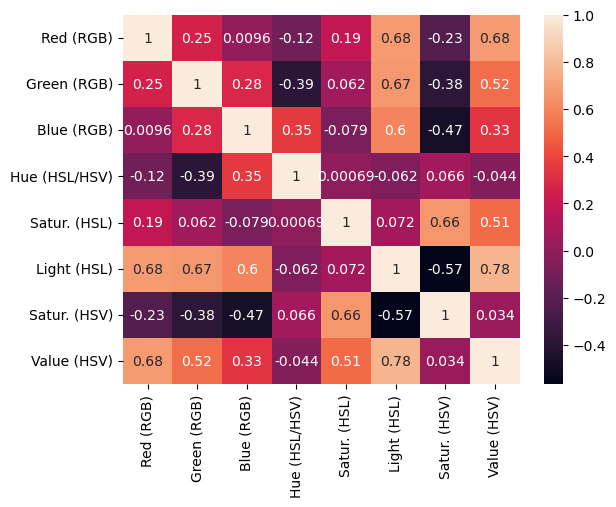

In [6]:
sns.heatmap(data=df_colors.corr(), annot=True)

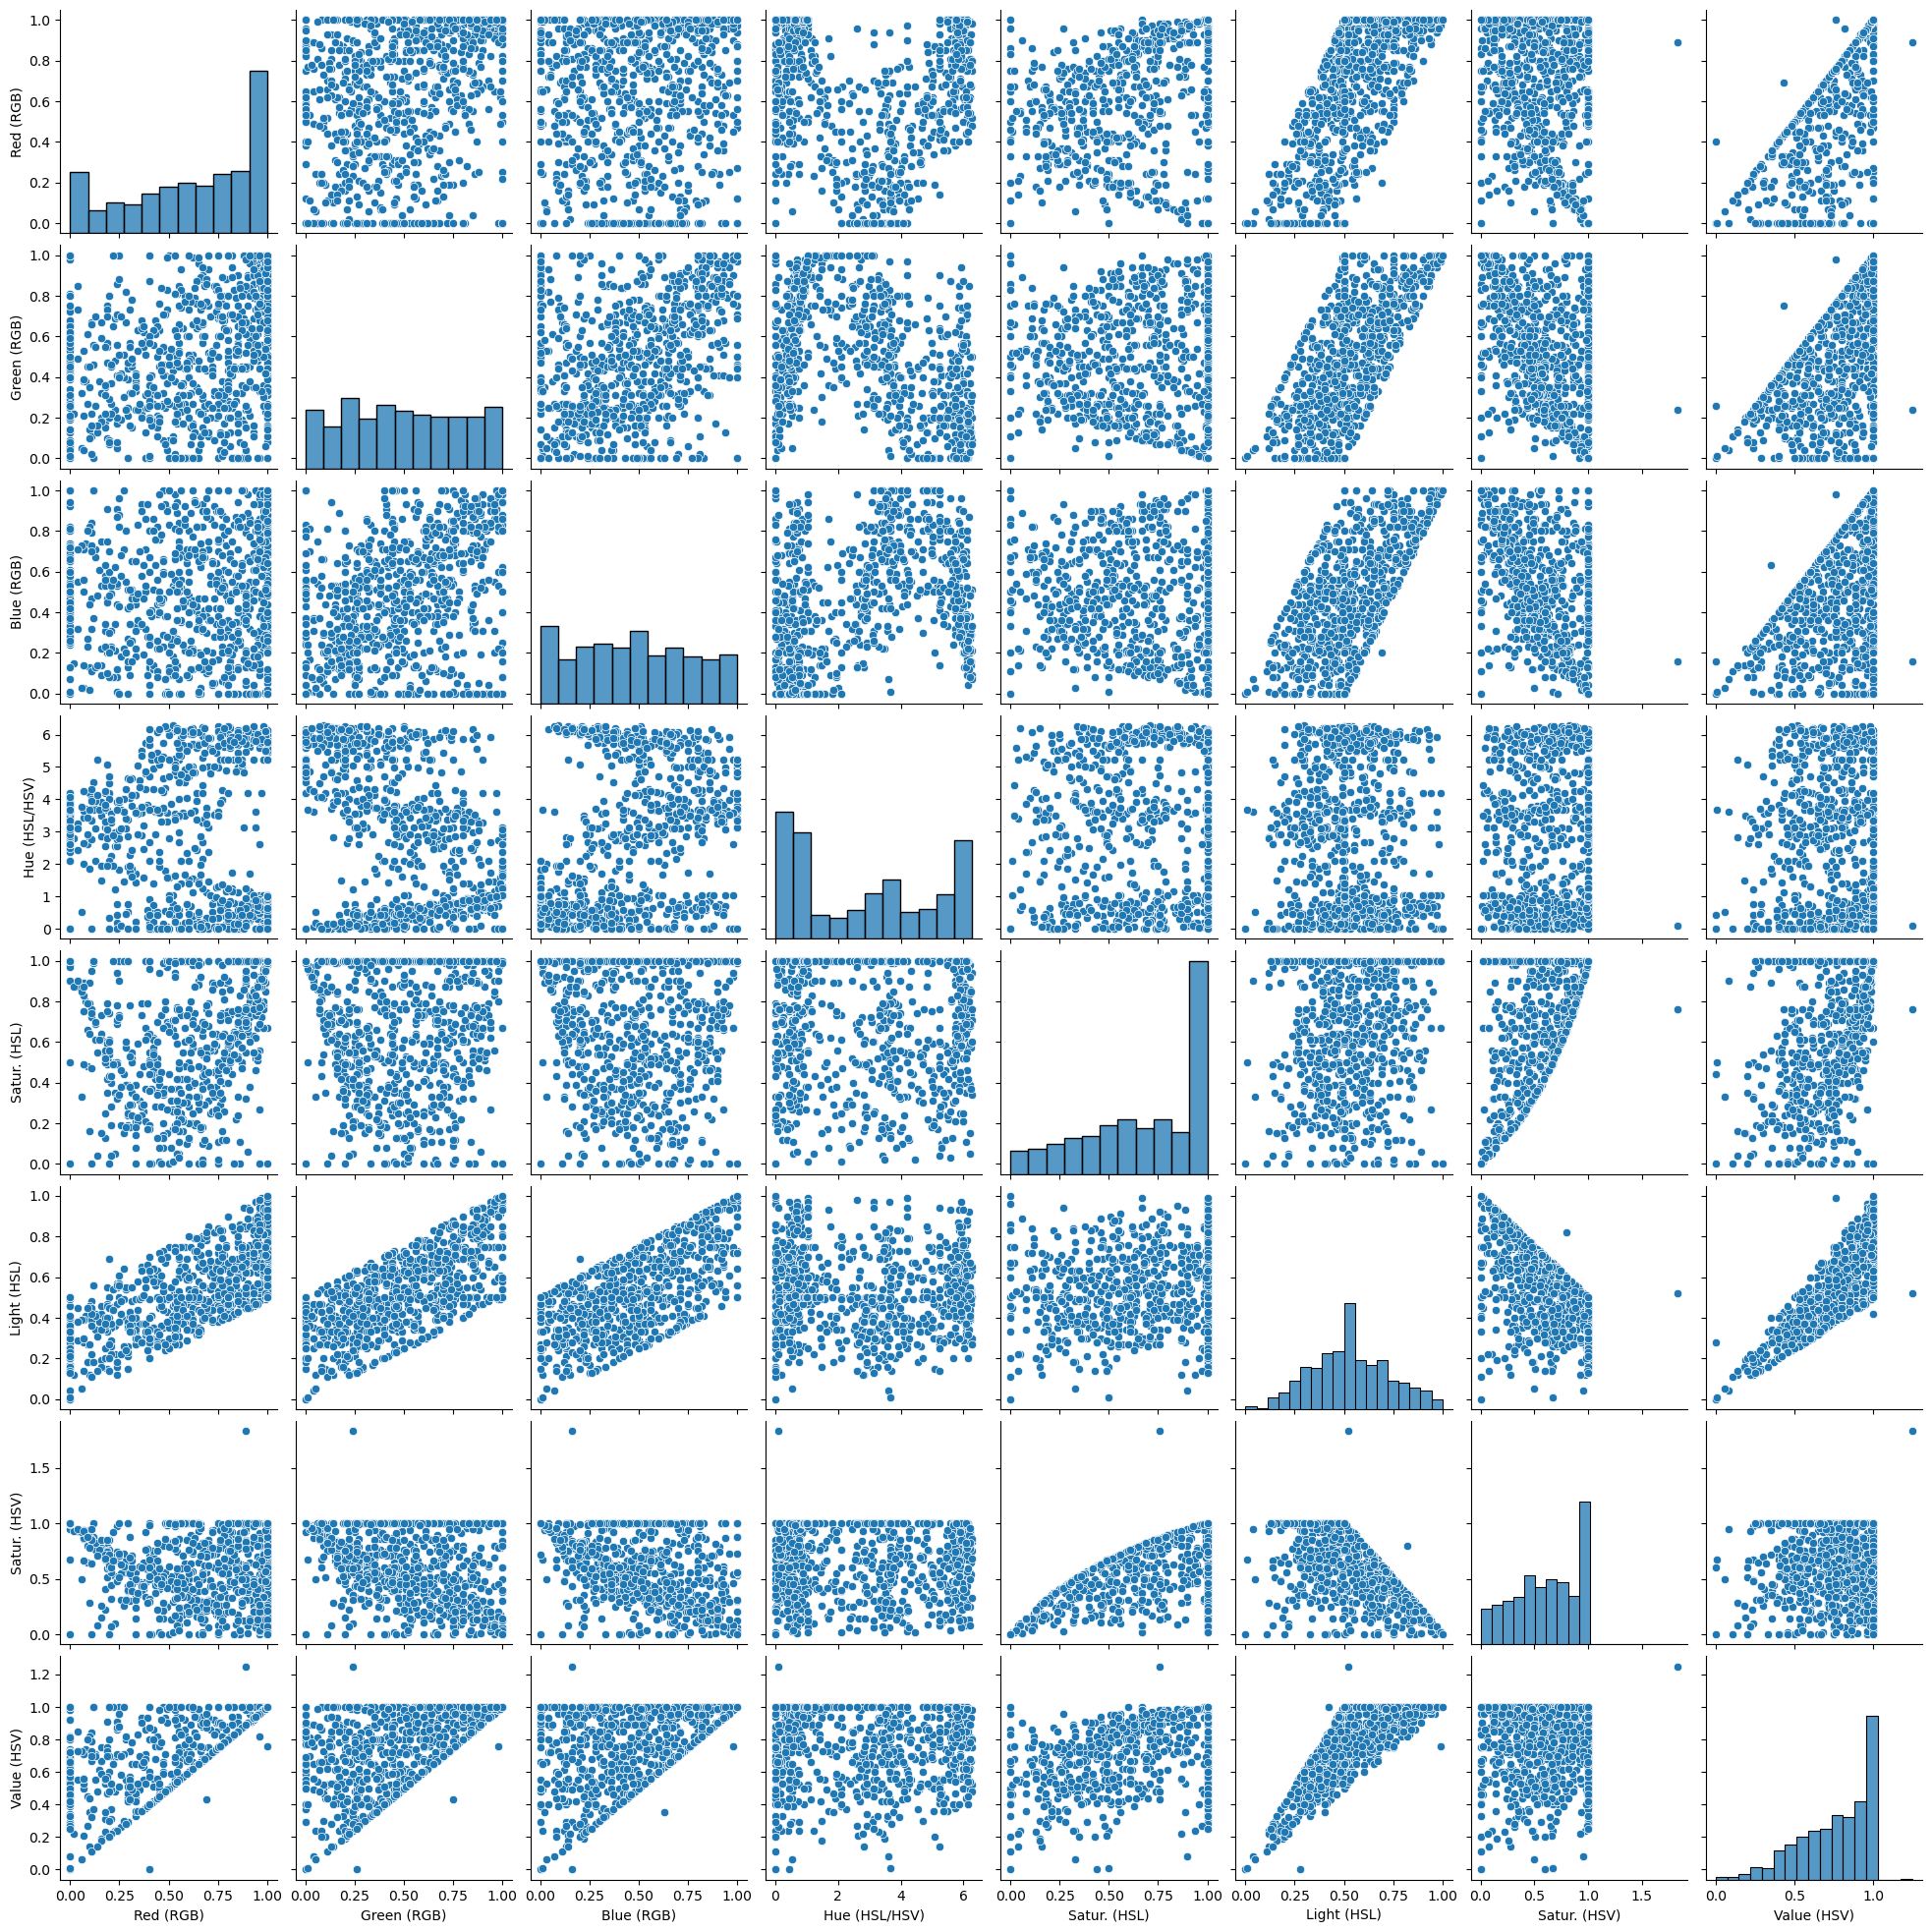

In [7]:
sns.pairplot(df_colors)

Colors are looked up by splitting the query color name by words, then looking for the first exact match with one of the words, but if there are none then it looks for any color with a name containing any of the query words.

For example, consider looking up colors with the word "brown" in their name. Notice that none of the colors are literally "brown" though they all have "brown" in the name.

In [8]:
df_colors.loc[df_colors.Name.str.contains("brown")]

Name Hex (RGB)  Red (RGB)  Green (RGB)  Blue (RGB)  \
47                bistre brown   #967117       0.59         0.44        0.09   
79                 brown sugar   #AF6E4D       0.69         0.43        0.30   
84             burnished brown   #A17A74       0.63         0.48        0.45   
157               coyote brown   #81613C       0.51         0.38        0.24   
168                 dark brown   #654321       0.40         0.26        0.13   
209            drab dark brown   #4A412A       0.29         0.25        0.16   
271               golden brown   #996515       0.60         0.40        0.08   
596  pullman brown (ups brown)   #644117       0.39         0.25        0.09   
661                 rosy brown   #BC8F8F       0.74         0.56        0.56   
677               saddle brown   #8B4513       0.55         0.27        0.07   
688                sandy brown   #F4A460       0.96         0.64        0.38   
701                 seal brown   #59260B       0.20         0.08        0.08   
765                sweet brown   #A83731       0.66         0.22        0.19   
799               tuscan brown   #6F4E37       0.44         0.31        0.22   
821             van dyke brown   #664228       0.40         0.26        0.16   
860                 wood brown   #C19A6B       0.76         0.60        0.42   

     Hue (HSL/HSV)  Satur. (HSL)  Light (HSL)  Satur. (HSV)  Value (HSV)  \
47        0.750492          0.73         0.34          0.85         0.59   
79        0.349066          0.39         0.49          0.56         0.69   
84        0.139626          0.19         0.54          0.28         0.63   
157       0.558505          0.37         0.37          0.52         0.51   
168       0.523599          0.51         0.26          0.67         0.40   
209       0.750492          0.28         0.23          0.43         0.29   
271       0.628319          0.76         0.34          0.86         0.60   
596       0.575959          0.63         0.24          0.77         0.39   
661       0.000000          0.25         0.65          0.24         0.74   
677       0.436332          0.76         0.31          0.86         0.55   
688       0.488692          0.87         0.67          0.61         0.96   
701       0.000000          0.43         0.14          0.60         0.20   
765       0.052360          0.55         0.43          0.71         0.66   
799       0.436332          0.34         0.33          0.50         0.44   
821       0.436332          0.44         0.28          0.60         0.00   
860       0.575959          0.41         0.59          0.45         0.76   

           Source  
47       ISCC-NBS  
79        Crayola  
84        Crayola  
157  colorcode.is  
168       X11/Web  
209       Pantone  
271          <NA>  
596          <NA>  
661          <NA>  
677          <NA>  
688          <NA>  
701          <NA>  
765          <NA>  
799          <NA>  
821          <NA>  
860          <NA>

In [9]:
def colorInfo(color):
    color = color.lower()
    words = [color] if color.count(' ') == 0 else [color] + color.split(' ')
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name == word]
            if len(items) > 0:
                return items
        except:
            continue
    
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name.str.contains(word)]
            if len(items) > 0:
                return items
        except:
            continue
        
    return None

def rgb(color):
    info = colorInfo(color)
    if info is None: return (None, None, None)
    r = info['Red (RGB)'].values[0]
    g = info['Green (RGB)'].values[0]
    b = info['Blue (RGB)'].values[0]
    return (r, g, b)

rgb('brown')

(0.59, 0.44, 0.09)

In [10]:
def flatten(x):
    res = []
    for y in x:
        res.extend(y)
    return res

flatten([(1, 2), ('x', 'y')])

[1, 2, 'x', 'y']

This cell takes several minutes to complete

In [11]:
# color

def twoColors(colors):
    return colors if len(colors) == 2 else [colors[0], colors[0]]

df_out['Colors (count)'] = df_out.Color.str.count('/') + 1
df_out.head(10).Color
# df_out_1 = df_out.head(10)
colorsRGB = [flatten([rgb(color) for color in twoColors(colors)]) for colors in df_out.Color.str.split('/')]
df_out = df_out.assign(**{
    'Color 0 R': [colorRGB[0] for colorRGB in colorsRGB],
    'Color 0 G': [colorRGB[1] for colorRGB in colorsRGB],
    'Color 0 B': [colorRGB[2] for colorRGB in colorsRGB],
    'Color 1 R': [colorRGB[3] for colorRGB in colorsRGB],
    'Color 1 G': [colorRGB[4] for colorRGB in colorsRGB],
    'Color 1 B': [colorRGB[5] for colorRGB in colorsRGB],
})
df_out

Animal ID        Name            DateTime MonthYear Date of Birth  \
0        A794011       Chunk 2019-05-08 18:20:00  May 2019    2017-05-02   
1        A776359       Gizmo 2018-07-18 16:02:00  Jul 2018    2017-07-12   
2        A821648        <NA> 2020-08-16 11:38:00  Aug 2020    2019-08-16   
3        A720371       Moose 2016-02-13 17:59:00  Feb 2016    2015-10-08   
4        A674754        <NA> 2014-03-18 11:47:00  Mar 2014    2014-03-12   
...          ...         ...                 ...       ...           ...   
149506   A859974  *Lady Gaga 2022-08-16 11:42:00  Aug 2022    2012-06-21   
149507   A856973      *Suede 2022-06-11 15:39:00  Jun 2022    2021-05-10   
149508   A852036       Queen 2022-03-17 17:22:00  Mar 2022    2021-12-08   
149509   A852775     A852775 2022-05-18 14:13:00  May 2022    2022-01-31   
149510   A854626     A854626 2022-05-03 16:10:00  May 2022    2022-02-27   

       Outcome Type Outcome Subtype Animal Type Sex upon Outcome  \
0         Rto-Adopt            <NA>         Cat    Neutered Male   
1          Adoption            <NA>         Dog    Neutered Male   
2        Euthanasia            <NA>       Other          Unknown   
3          Adoption            <NA>         Dog    Neutered Male   
4          Transfer         Partner         Cat      Intact Male   
...             ...             ...         ...              ...   
149506     Adoption            <NA>         Cat    Spayed Female   
149507     Adoption            <NA>         Cat    Spayed Female   
149508     Adoption            <NA>         Dog    Spayed Female   
149509     Adoption          Foster         Cat    Spayed Female   
149510     Adoption          Foster         Cat    Neutered Male   

       Age upon Outcome                               Breed  \
0               2 years              Domestic Shorthair Mix   
1                1 year             Chihuahua Shorthair Mix   
2                1 year                             Raccoon   
3              4 months  Anatol Shepherd/Labrador Retriever   
4                6 days              Domestic Shorthair Mix   
...                 ...                                 ...   
149506         10 years                           Devon Rex   
149507           1 year                Domestic Medium Hair   
149508         3 months                 German Shepherd Mix   
149509         3 months            Domestic Medium Hair Mix   
149510         2 months              Domestic Shorthair Mix   

                    Color  Colors (count)  Color 0 R  Color 0 G  Color 0 B  \
0       Brown Tabby/White               2       0.59       0.44       0.09   
1             White/Brown               2       1.00       1.00       1.00   
2                    Gray               1       0.70       0.75       0.71   
3                    Buff               1       1.00       0.78       0.50   
4            Orange Tabby               1       1.00       0.50       0.00   
...                   ...             ...        ...        ...        ...   
149506              White               1       1.00       1.00       1.00   
149507               Blue               1       0.00       0.00       1.00   
149508        Brown/Black               2       0.59       0.44       0.09   
149509             Tortie               1        NaN        NaN        NaN   
149510       Orange Tabby               1       1.00       0.50       0.00   

        Color 1 R  Color 1 G  Color 1 B  
0            1.00       1.00       1.00  
1            0.59       0.44       0.09  
2            0.70       0.75       0.71  
3            1.00       0.78       0.50  
4            1.00       0.50       0.00  
...           ...        ...        ...  
149506       1.00       1.00       1.00  
149507       0.00       0.00       1.00  
149508       0.00       0.00       0.00  
149509        NaN        NaN        NaN  
149510       1.00       0.50       0.00  

[149511 rows x 19 columns]

## Sex

Male or female are classified in two columns since some animals are of unknown sex

In [12]:
# sex and neuter/spay columns

sex_male = df_out['Sex upon Outcome'].str.endswith(' Male')
sex_female = df_out['Sex upon Outcome'].str.endswith(' Female')
neutered_or_spayed = df_out['Sex upon Outcome'].str.startswith('Neutered') | df_out['Sex upon Outcome'].str.startswith('Spayed')

df_out['Male'] = sex_male
df_out['Female'] = sex_female
df_out['NeuteredOrSpayed'] = neutered_or_spayed
df_out = df_out.convert_dtypes(convert_boolean=True)
df_out.info()
df_out.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         149511 non-null  string        
 1   Name              106260 non-null  string        
 2   DateTime          149511 non-null  datetime64[ns]
 3   MonthYear         149511 non-null  string        
 4   Date of Birth     149511 non-null  datetime64[ns]
 5   Outcome Type      149485 non-null  string        
 6   Outcome Subtype   68443 non-null   string        
 7   Animal Type       149511 non-null  string        
 8   Sex upon Outcome  149509 non-null  string        
 9   Age upon Outcome  149465 non-null  string        
 10  Breed             149511 non-null  string        
 11  Color             149511 non-null  string        
 12  Colors (count)    149511 non-null  Int64         
 13  Color 0 R         135638 non-null  Float64       
 14  Colo

Animal ID        Name            DateTime MonthYear Date of Birth  \
0   A794011       Chunk 2019-05-08 18:20:00  May 2019    2017-05-02   
1   A776359       Gizmo 2018-07-18 16:02:00  Jul 2018    2017-07-12   
2   A821648        <NA> 2020-08-16 11:38:00  Aug 2020    2019-08-16   
3   A720371       Moose 2016-02-13 17:59:00  Feb 2016    2015-10-08   
4   A674754        <NA> 2014-03-18 11:47:00  Mar 2014    2014-03-12   
5   A659412    Princess 2020-10-05 14:37:00  Oct 2020    2013-03-24   
6   A814515     Quentin 2020-05-06 07:59:00  May 2020    2018-03-01   
7   A868405        *Leo 2023-03-04 13:38:00  Mar 2023    2020-11-02   
8   A689724  *Donatello 2014-10-18 18:52:00  Oct 2014    2014-08-01   
9   A680969       *Zeus 2014-08-05 16:59:00  Aug 2014    2014-06-03   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0    Rto-Adopt            <NA>         Cat    Neutered Male          2 years   
1     Adoption            <NA>         Dog    Neutered Male           1 year   
2   Euthanasia            <NA>       Other          Unknown           1 year   
3     Adoption            <NA>         Dog    Neutered Male         4 months   
4     Transfer         Partner         Cat      Intact Male           6 days   
5     Adoption            <NA>         Dog    Spayed Female          7 years   
6     Adoption          Foster         Dog    Neutered Male          2 years   
7     Adoption            <NA>         Dog    Neutered Male          2 years   
8     Adoption            <NA>         Cat    Neutered Male         2 months   
9     Adoption            <NA>         Cat    Neutered Male         2 months   

   ... Colors (count) Color 0 R  Color 0 G  Color 0 B  Color 1 R  Color 1 G  \
0  ...              2      0.59       0.44       0.09        1.0        1.0   
1  ...              2       1.0        1.0        1.0       0.59       0.44   
2  ...              1       0.7       0.75       0.71        0.7       0.75   
3  ...              1       1.0       0.78        0.5        1.0       0.78   
4  ...              1       1.0        0.5        0.0        1.0        0.5   
5  ...              1      0.59       0.44       0.09       0.59       0.44   
6  ...              2       1.0        1.0        1.0       0.59       0.44   
7  ...              2      0.59       0.44       0.09        1.0        1.0   
8  ...              1       0.0        0.0        0.0        0.0        0.0   
9  ...              2       1.0        1.0        1.0        1.0        0.5   

   Color 1 B   Male  Female  NeuteredOrSpayed  
0        1.0   True   False              True  
1       0.09   True   False              True  
2       0.71  False   False             False  
3        0.5   True   False              True  
4        0.0   True   False             False  
5       0.09  False    True              True  
6       0.09   True   False              True  
7        1.0   True   False              True  
8        0.0   True   False              True  
9        0.0   True   False              True  

[10 rows x 22 columns]

## Adopted?

In [13]:
df_out['Adopted'] = df_out['Outcome Type'].str.find('Adopt') >= 0

In [14]:
def bigCorr_categorical(independent, dependent):
    return (
        df_out[[independent, dependent]].groupby(independent).value_counts().div(
        df_out[[independent]].groupby(independent).value_counts())
    )[:,True]

# Analysis by breed

In [15]:
df_breeds = pd.DataFrame(index=df_out.Breed.unique())
df_breeds

Empty DataFrame
Columns: []
Index: [Domestic Shorthair Mix, Chihuahua Shorthair Mix, Raccoon, Anatol Shepherd/Labrador Retriever, American Foxhound/Labrador Retriever, Pit Bull Mix, Border Collie/Cardigan Welsh Corgi, Pit Bull, Domestic Shorthair, Labrador Retriever Mix, Domestic Medium Hair Mix, Doberman Pinsch, Domestic Medium Hair, German Shepherd Mix, Opossum, Weimaraner/Labrador Retriever, Yorkshire Terrier Mix, Jack Russell Terrier/Chihuahua Shorthair, Great Pyrenees Mix, Bat Mix, Chihuahua Shorthair, Australian Cattle Dog Mix, Beagle Mix, Labrador Retriever/Staffordshire, German Shepherd, Dogo Argentino Mix, Black Mouth Cur Mix, Bat, Australian Cattle Dog, Border Collie Mix, Collie Rough Mix, Polish, Rat Terrier/Cardigan Welsh Corgi, American Staffordshire Terrier Mix, Labrador Retriever, Miniature Poodle Mix, Dachshund/Chihuahua Shorthair, Standard Schnauzer/Miniature Poodle, Pug Mix, American Bulldog, American Pit Bull Terrier Mix, Siberian Husky, German Shorthair Pointer, Siberian Husky Mix, Australian Kelpie Mix, Yorkshire Terrier/Miniature Poodle, Miniature Schnauzer Mix, Miniature Pinscher Mix, Boxer Mix, Catahoula/Pointer, Standard Poodle, Great Pyrenees, Staffordshire Mix, Dachshund Mix, Siamese Mix, Queensland Heeler/Pointer, American Bulldog Mix, Catahoula Mix, Rabbit Sh, Pit Bull/Chow Chow, Beagle/Dachshund, Pit Bull/Australian Cattle Dog, Boxer/Australian Cattle Dog, Border Terrier, Flat Coat Retriever/Pit Bull, Mastiff Mix, Cairn Terrier Mix, Golden Retriever/Bearded Collie, American Eskimo Mix, Boston Terrier Mix, Vizsla Mix, Guinea Pig Mix, Shiba Inu Mix, Standard Poodle/Labrador Retriever, Australian Cattle Dog/German Shepherd, Labrador Retriever/Beagle, Miniature Pinscher, Rabbit Sh Mix, Rottweiler/Staffordshire, Pit Bull/Border Collie, Staffordshire/Basset Hound, Boxer, Akita Mix, Australian Shepherd/Australian Cattle Dog, Persian, Labrador Retriever/Pit Bull, Chicken Mix, English Bulldog, Chihuahua Shorthair/Rat Terrier, Flat Coat Retriever Mix, Chihuahua Longhair Mix, Miniature Poodle/Miniature Schnauzer, Jack Russell Terrier Mix, Harrier Mix, Australian Cattle Dog/Labrador Retriever, Staffordshire/Boxer, Dachshund Wirehair Mix, American Foxhound Mix, Anatol Shepherd, German Shepherd/Labrador Retriever, ...]

[2833 rows x 0 columns]

In [16]:
# Add animal type to the breed

breeds = [breed_type[0] for breed_type in df_out[['Breed', 'Animal Type']].groupby('Breed').value_counts().index]
types = [breed_type[1] for breed_type in df_out[['Breed', 'Animal Type']].groupby('Breed').value_counts().index]
df_breeds_types = pd.DataFrame(data=types, index=breeds, columns=['Type'])
df_breeds_types = df_breeds_types.assign(Breed=breeds)
df_breeds_types = df_breeds_types.drop_duplicates('Breed')
df_breeds = df_breeds.assign(**{'Animal Type': df_breeds_types['Type']})
df_breeds = df_breeds.convert_dtypes(infer_objects=True)
df_breeds

Animal Type
Domestic Shorthair Mix                       Cat
Chihuahua Shorthair Mix                      Dog
Raccoon                                    Other
Anatol Shepherd/Labrador Retriever           Dog
American Foxhound/Labrador Retriever         Dog
...                                          ...
Pointer/Alaskan Husky                        Dog
Harrier/Anatol Shepherd                      Dog
German Shepherd/Dachshund                    Dog
Pointer/Smooth Fox Terrier                   Dog
Pointer/English Coonhound                    Dog

[2833 rows x 1 columns]

In [17]:
## Adoption likelihood

df_breeds = df_breeds.assign(Adopted=bigCorr_categorical('Breed', 'Adopted'))
df_breeds

Animal Type   Adopted
Domestic Shorthair Mix                       Cat  0.461425
Chihuahua Shorthair Mix                      Dog  0.483181
Raccoon                                    Other       NaN
Anatol Shepherd/Labrador Retriever           Dog  0.583333
American Foxhound/Labrador Retriever         Dog  1.000000
...                                          ...       ...
Pointer/Alaskan Husky                        Dog  1.000000
Harrier/Anatol Shepherd                      Dog  1.000000
German Shepherd/Dachshund                    Dog  1.000000
Pointer/Smooth Fox Terrier                   Dog       NaN
Pointer/English Coonhound                    Dog  1.000000

[2833 rows x 2 columns]

In [18]:
# This cell should be moved somewhere else
bigCorr_categorical('Color', 'Adopted')

Color
Agouti                0.629630
Agouti/Brown Tabby    1.000000
Agouti/Gray           1.000000
Agouti/White          0.500000
Apricot               0.455556
                        ...   
Yellow/Green          0.500000
Yellow/Orange         0.333333
Yellow/Red            1.000000
Yellow/Tan            0.250000
Yellow/White          0.508671
Length: 485, dtype: float64

In [19]:
def means(df_groups, df_individual, independent, dependent):
    df_groups[f'{dependent} (mean)'] = df_individual[[independent, dependent]].groupby(independent).mean()
def stdDevs(df_groups, df_individual, independent, dependent):
    df_groups[f'{dependent} (std dev)'] = df_individual[[independent, dependent]].groupby(independent).std()
def stats(df_groups, df_individual, independent, dependent):
    means(df_groups, df_individual, independent, dependent)
    stdDevs(df_groups, df_individual, independent, dependent)
    
stats(df_breeds, df_out, 'Breed', 'Color 0 R')
stats(df_breeds, df_out, 'Breed', 'Color 0 G')
stats(df_breeds, df_out, 'Breed', 'Color 0 B')

stats(df_breeds, df_out, 'Breed', 'Color 1 R')
stats(df_breeds, df_out, 'Breed', 'Color 1 G')
stats(df_breeds, df_out, 'Breed', 'Color 1 B')

df_breeds.head()

Animal Type   Adopted  Color 0 R (mean)  \
Domestic Shorthair Mix                       Cat  0.461425          0.439476   
Chihuahua Shorthair Mix                      Dog  0.483181          0.609789   
Raccoon                                    Other       NaN          0.437671   
Anatol Shepherd/Labrador Retriever           Dog  0.583333          0.763611   
American Foxhound/Labrador Retriever         Dog  1.000000               1.0   

                                      Color 0 R (std dev)  Color 0 G (mean)  \
Domestic Shorthair Mix                           0.412274          0.322711   
Chihuahua Shorthair Mix                          0.370759          0.493648   
Raccoon                                          0.310867          0.413988   
Anatol Shepherd/Labrador Retriever               0.260660          0.672222   
American Foxhound/Labrador Retriever             0.000000               1.0   

                                      Color 0 G (std dev)  Color 0 B (mean)  \
Domestic Shorthair Mix                           0.323957          0.286948   
Chihuahua Shorthair Mix                          0.361854          0.356013   
Raccoon                                          0.316846          0.298782   
Anatol Shepherd/Labrador Retriever               0.288811          0.464722   
American Foxhound/Labrador Retriever             0.000000               1.0   

                                      Color 0 B (std dev)  Color 1 R (mean)  \
Domestic Shorthair Mix                           0.413041          0.616187   
Chihuahua Shorthair Mix                          0.369441          0.760626   
Raccoon                                          0.327126           0.36417   
Anatol Shepherd/Labrador Retriever               0.396827          0.717143   
American Foxhound/Labrador Retriever             0.000000              0.59   

                                      Color 1 R (std dev)  Color 1 G (mean)  \
Domestic Shorthair Mix                           0.427879          0.533746   
Chihuahua Shorthair Mix                          0.304728          0.668548   
Raccoon                                          0.360807          0.361811   
Anatol Shepherd/Labrador Retriever               0.410535          0.676857   
American Foxhound/Labrador Retriever             0.000000              0.44   

                                      Color 1 G (std dev)  Color 1 B (mean)  \
Domestic Shorthair Mix                           0.410991           0.50789   
Chihuahua Shorthair Mix                          0.335132          0.543445   
Raccoon                                          0.369510          0.303607   
Anatol Shepherd/Labrador Retriever               0.404895          0.608571   
American Foxhound/Labrador Retriever             0.000000              0.09   

                                      Color 1 B (std dev)  
Domestic Shorthair Mix                           0.474873  
Chihuahua Shorthair Mix                          0.394424  
Raccoon                                          0.363179  
Anatol Shepherd/Labrador Retriever               0.421518  
American Foxhound/Labrador Retriever             0.000000

/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

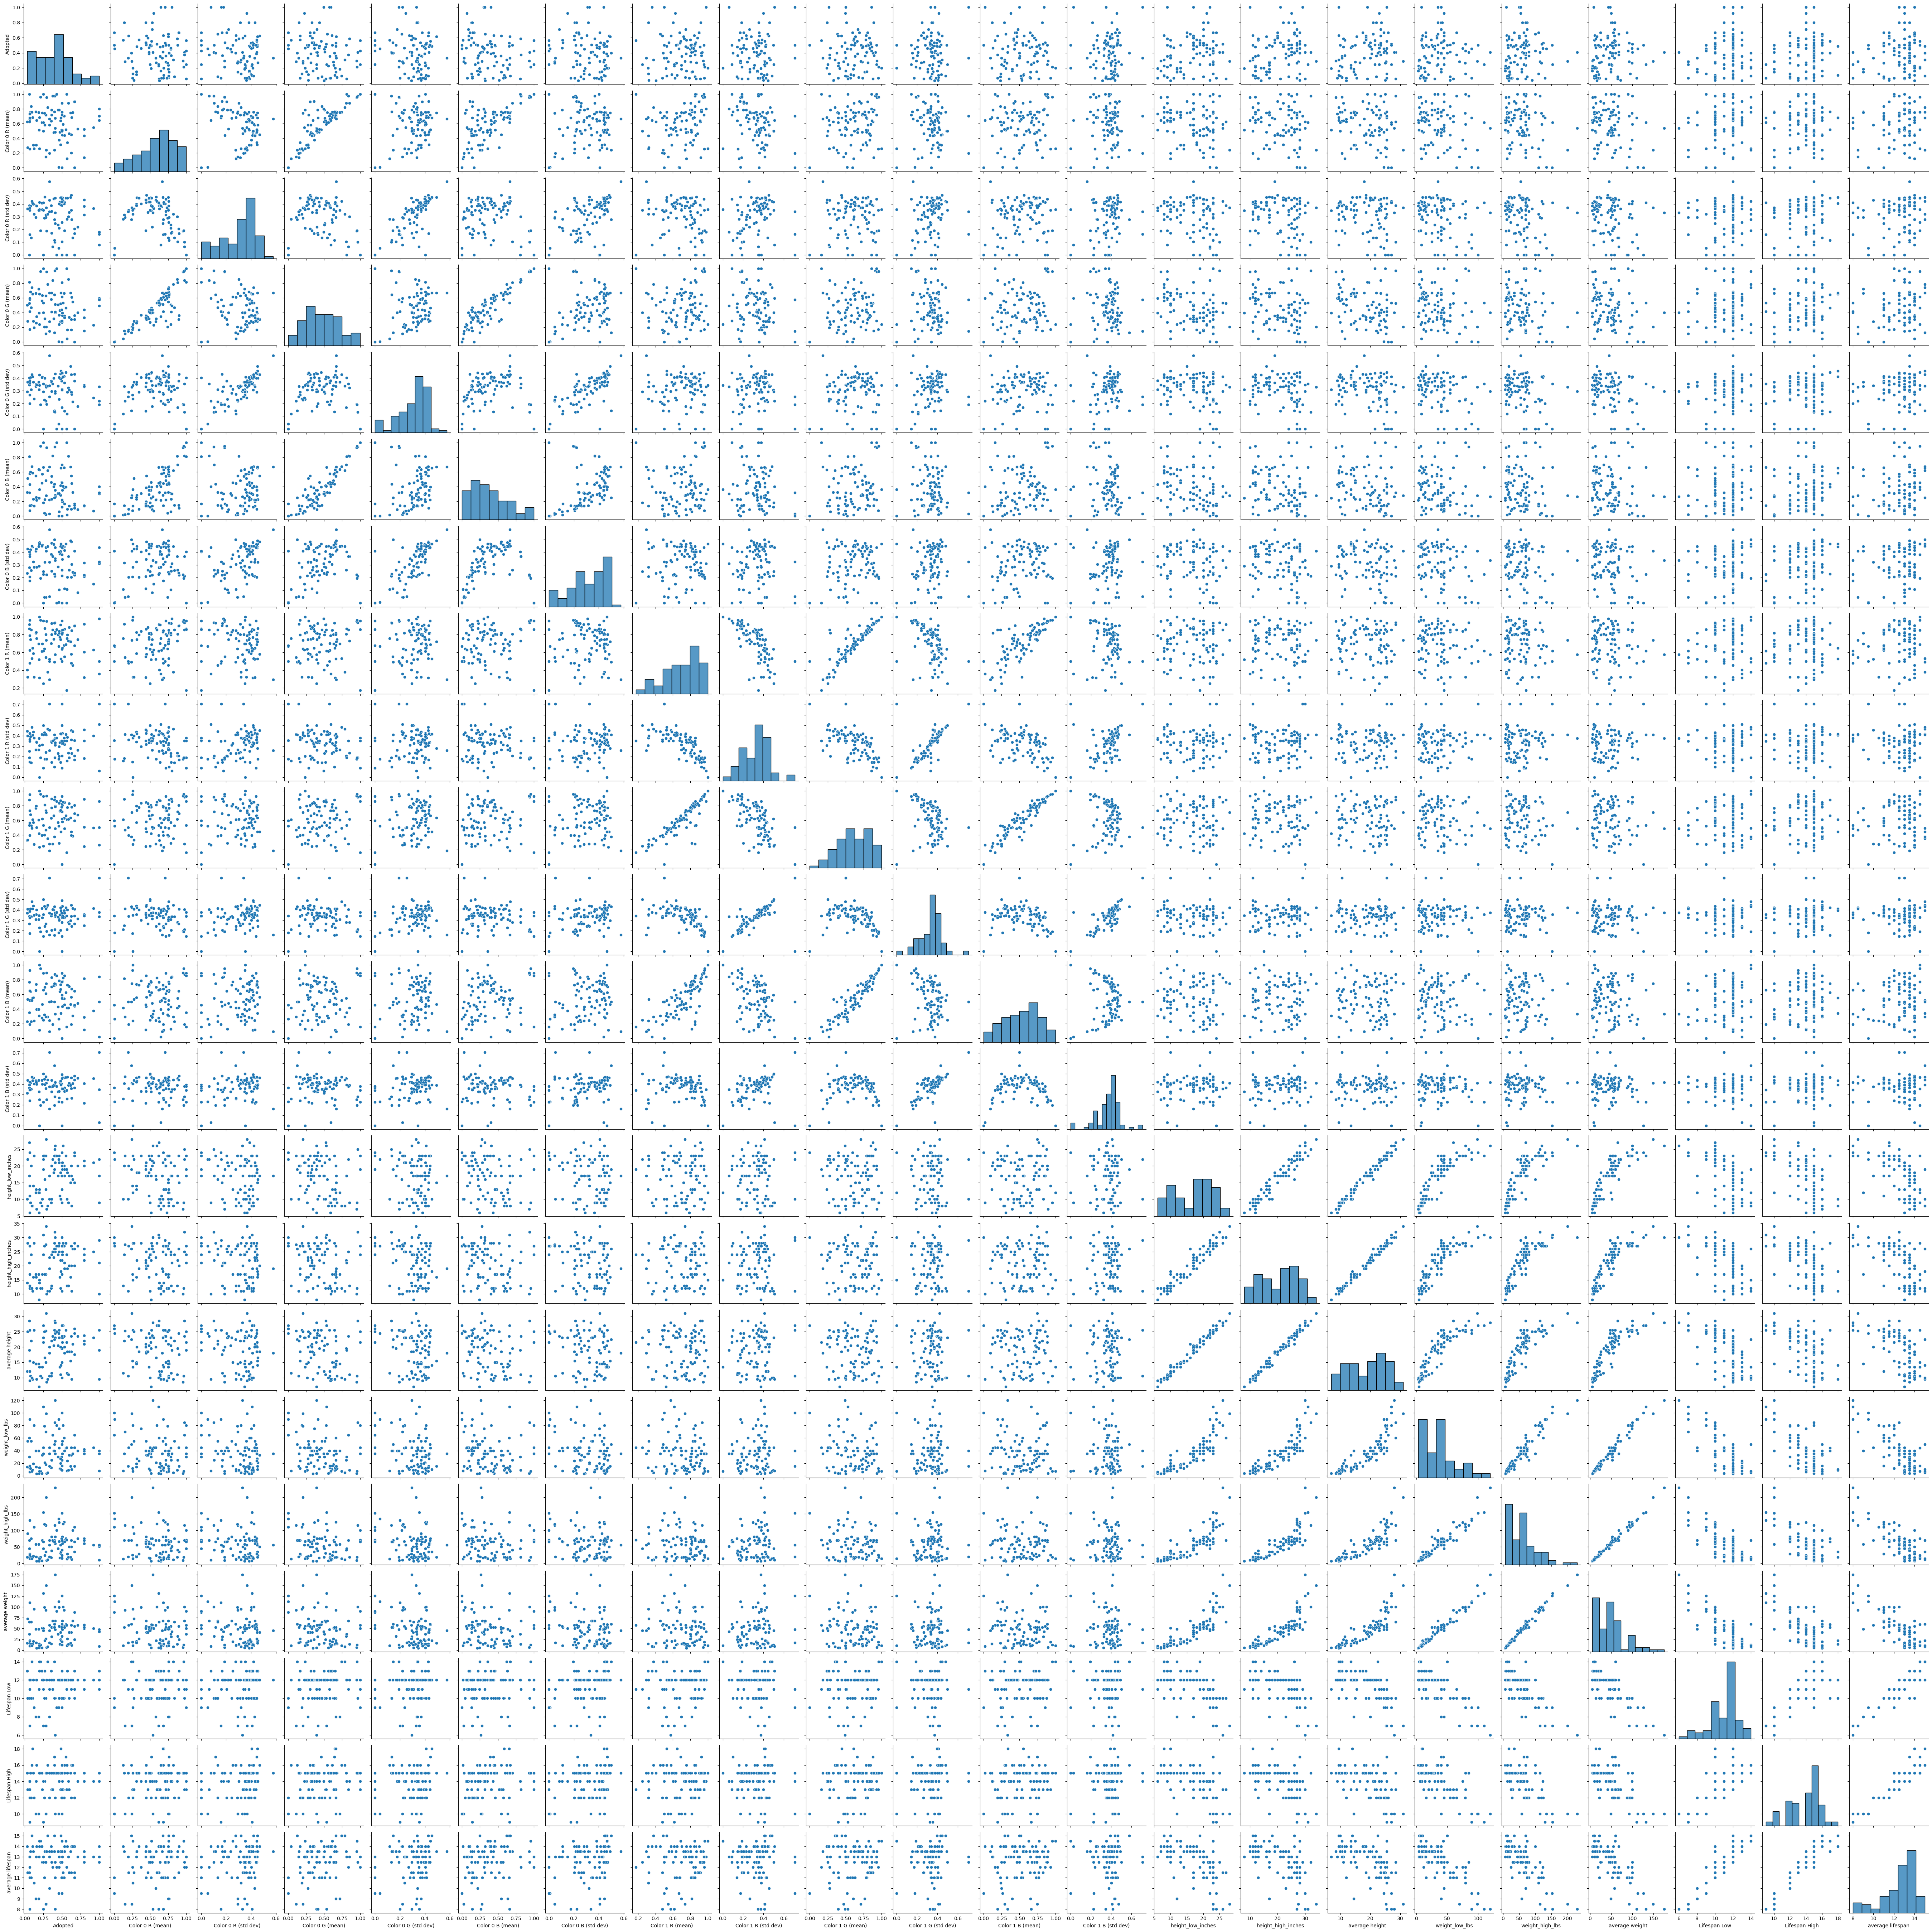

In [28]:
sns.pairplot(data=df_breeds)

In [21]:
# df_breeds_not_dogs_or_cats = df_breeds.loc[
#     (df_breeds['Animal Type'] != 'Dog') &
#     (df_breeds['Animal Type'] != 'Cat')]
# sns.pairplot(data=df_breeds_not_dogs_or_cats)

In [22]:
df_breeds_info = pd.read_csv('dog breeds_enriched_20210503.csv').convert_dtypes(infer_objects=True)
df_breeds_info.info()
df_breeds_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               195 non-null    string 
 1   Breed Group AKC     195 non-null    string 
 2   Breed Group CKC     195 non-null    string 
 3   Breed Group UKC     195 non-null    string 
 4   CKC Subgroup        194 non-null    string 
 5   height_low_inches   195 non-null    Float64
 6   height_high_inches  195 non-null    Float64
 7   average height      195 non-null    Float64
 8   weight_low_lbs      195 non-null    Float64
 9   weight_high_lbs     195 non-null    Int64  
 10  average weight      195 non-null    Float64
 11  Lifespan Low        194 non-null    Int64  
 12  Lifespan High       194 non-null    Int64  
 13  average lifespan    195 non-null    Float64
dtypes: Float64(6), Int64(3), string(5)
memory usage: 23.2 KB


Breed Breed Group AKC  \
0     Affenpinscher       Toy Group   
1      Afghan Hound     Hound Group   
2              Aidi  Not Recognized   
3  Airedale Terrier   Terrier Group   
4        Akbash Dog  Not Recognized   

                                   Breed Group CKC      Breed Group UKC  \
0               Group 5: Pinschers and Schnauzers        Companion Dog    
1                      Group 8: Sighthound Breeds   Sighthound & Pariah   
2                                   Not Recognized         Guardian Dog   
3                         Group 6: Terrier Breeds               Terrier   
4  Group 9: Large Guardian Pastoral/Mountain Dogs          Guardian Dog   

                           CKC Subgroup  height_low_inches  \
0  5-B: Small Pinschers and Schnauzers                 9.0   
1          8-B: Long Haired Sighthounds               25.0   
2                        Not Recognized               20.0   
3                   6-A: Large Terriers               22.0   
4                                  None               27.0   

   height_high_inches  average height  weight_low_lbs  weight_high_lbs  \
0                12.0            10.5             8.0               12   
1                27.0            26.0            50.0               60   
2                24.5           22.25            50.0               55   
3                24.0            23.0            45.0               45   
4                34.0            30.5            75.0              140   

   average weight  Lifespan Low  Lifespan High  average lifespan  
0            10.0            12             15              13.5  
1            55.0            12             15              13.5  
2            52.5            12             13              12.5  
3            45.0            11             14              12.5  
4           107.5             9             11              10.0

/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

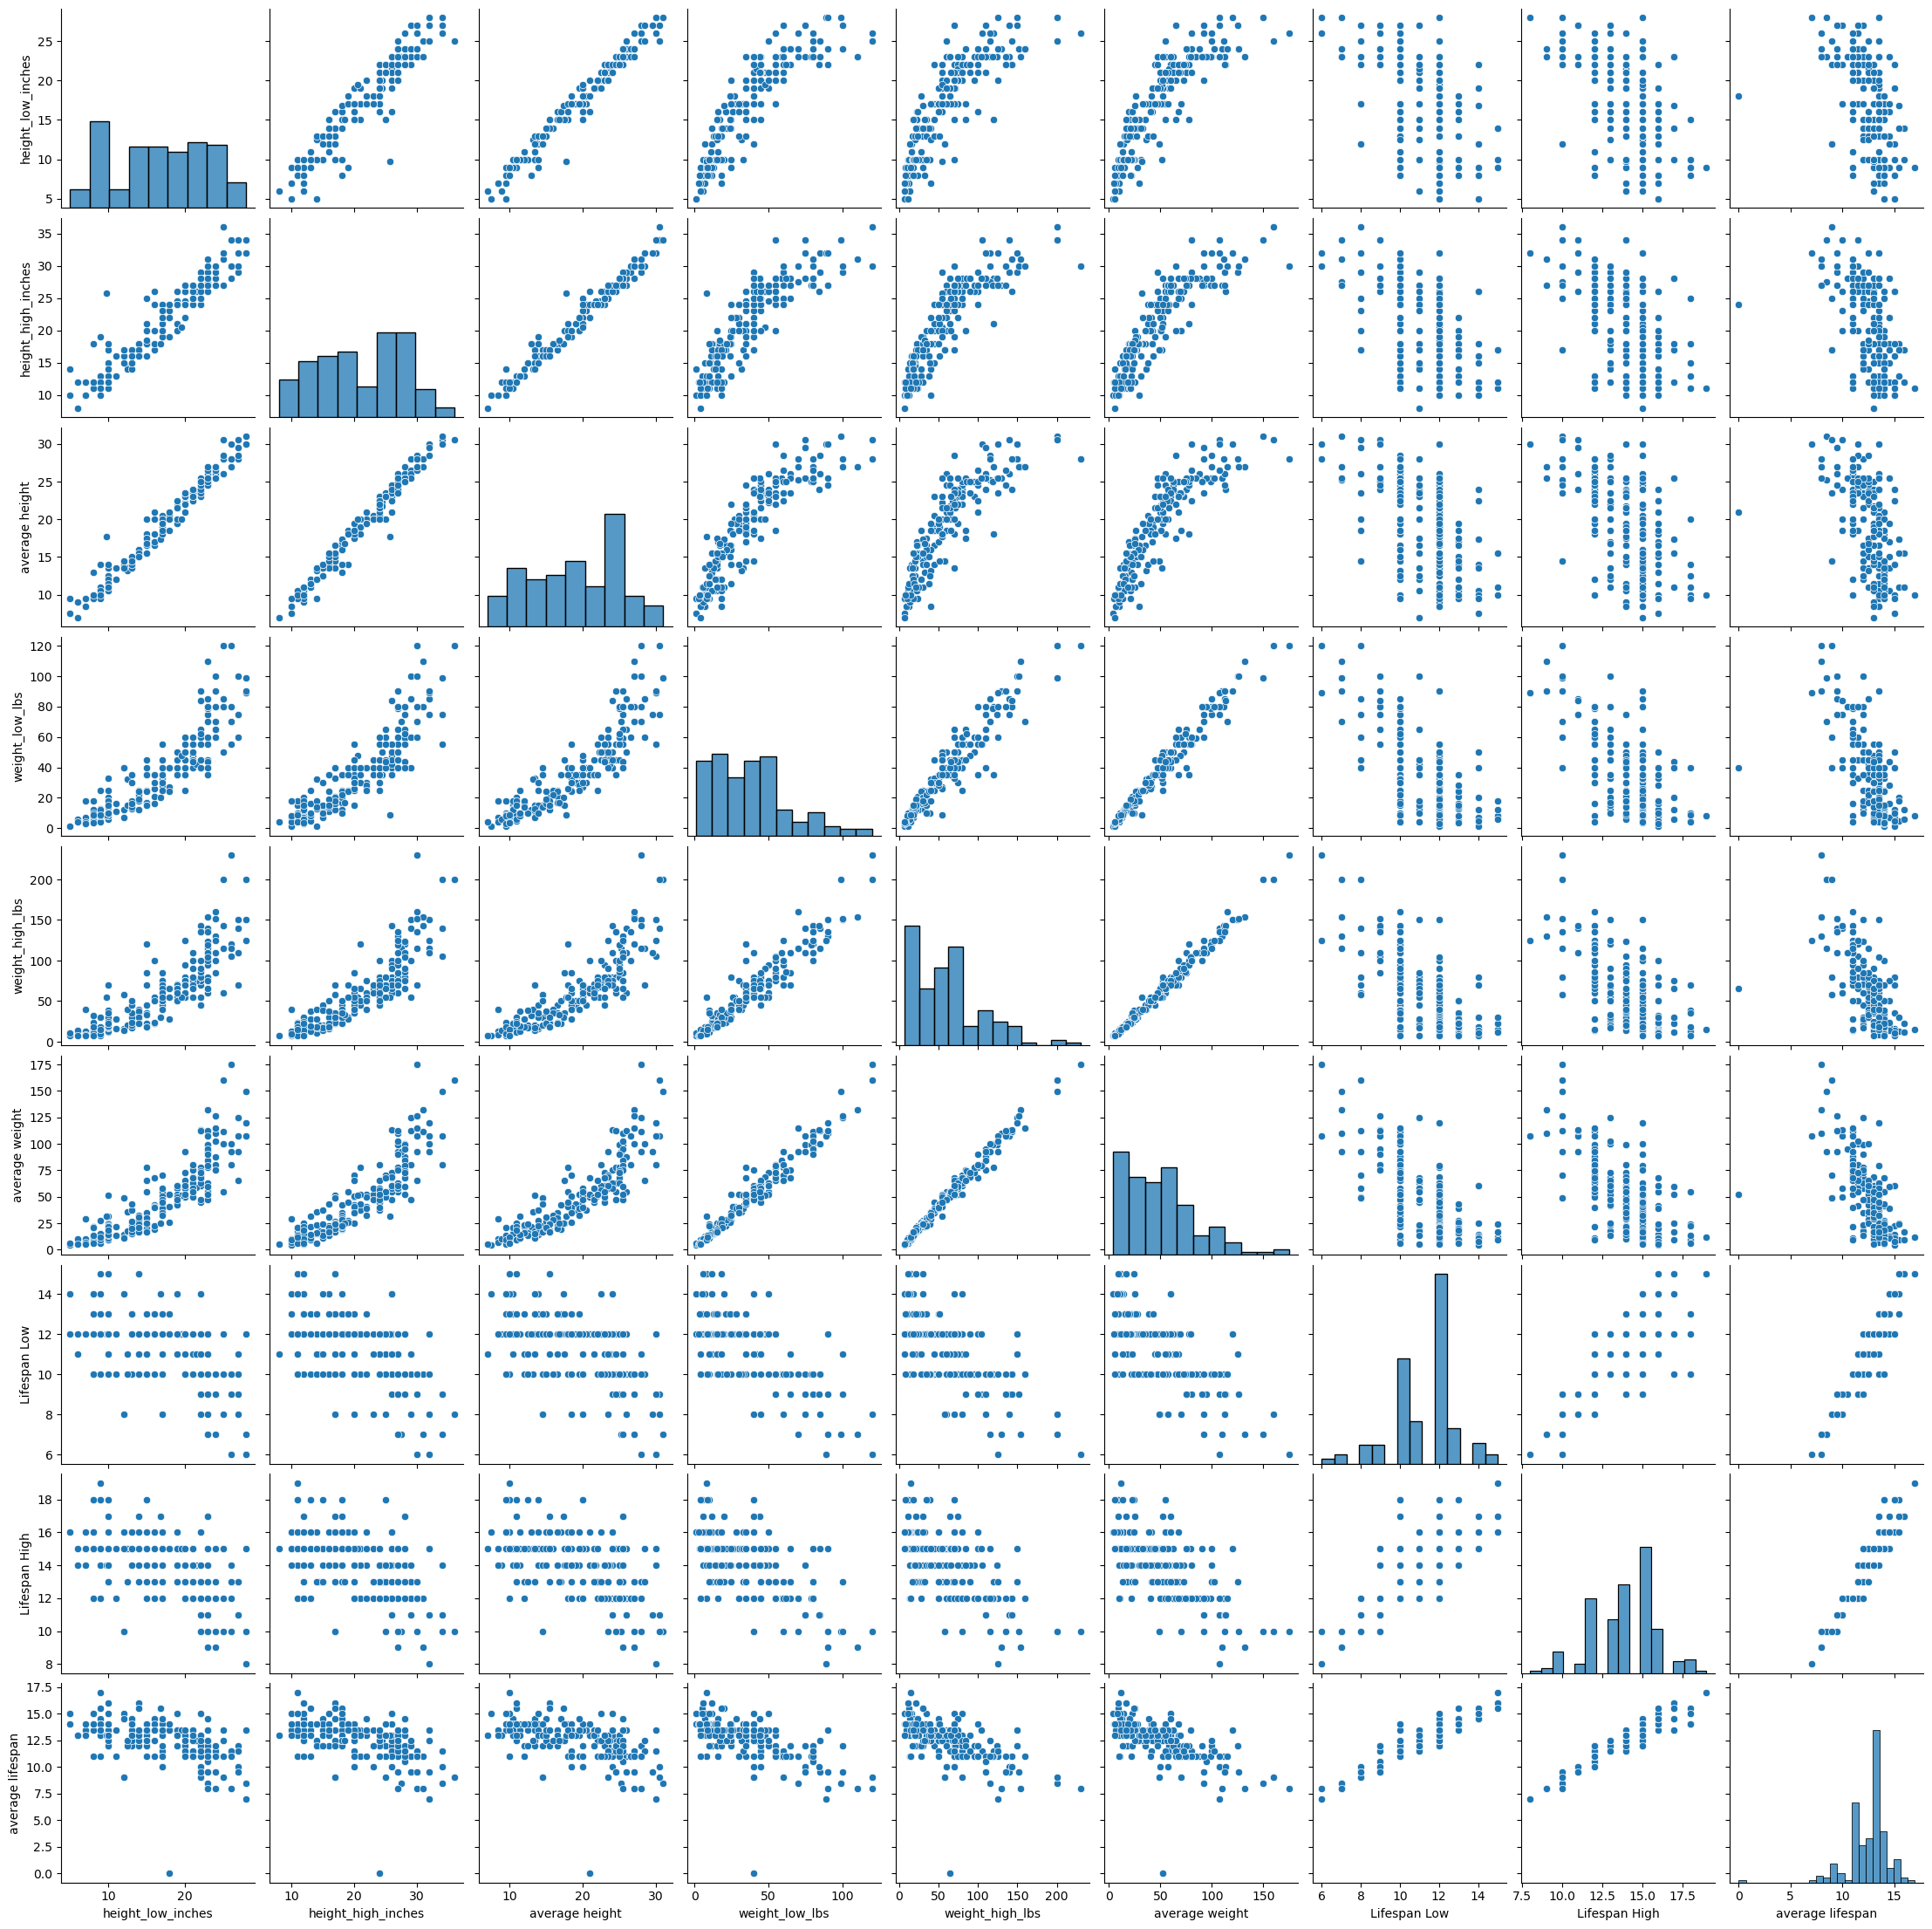

In [58]:
sns.pairplot(data=df_breeds_info)

In [23]:
df_breeds['Breed'] = df_breeds.index
df_breeds = df_breeds.merge(df_breeds_info, how='left', left_on='Breed', right_on='Breed').dropna()
df_breeds.info()
df_breeds.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 28 to 2350
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Animal Type          91 non-null     string 
 1   Adopted              91 non-null     float64
 2   Color 0 R (mean)     91 non-null     Float64
 3   Color 0 R (std dev)  91 non-null     float64
 4   Color 0 G (mean)     91 non-null     Float64
 5   Color 0 G (std dev)  91 non-null     float64
 6   Color 0 B (mean)     91 non-null     Float64
 7   Color 0 B (std dev)  91 non-null     float64
 8   Color 1 R (mean)     91 non-null     Float64
 9   Color 1 R (std dev)  91 non-null     float64
 10  Color 1 G (mean)     91 non-null     Float64
 11  Color 1 G (std dev)  91 non-null     float64
 12  Color 1 B (mean)     91 non-null     Float64
 13  Color 1 B (std dev)  91 non-null     float64
 14  Breed                91 non-null     string 
 15  Breed Group AKC      91 non-null     st

Animal Type   Adopted  Color 0 R (mean)  Color 0 R (std dev)  \
28         Dog  0.623894          0.449519             0.470024   
34         Dog  0.507266          0.444773             0.431108   
39         Dog  0.530435          0.705045             0.400066   
41         Dog  0.505376          0.509685             0.450212   
51         Dog  0.406504          0.976288             0.101306   

    Color 0 G (mean)  Color 0 G (std dev)  Color 0 B (mean)  \
28           0.30363             0.427486           0.54649   
34          0.358808             0.404615          0.196473   
39          0.662703             0.412465          0.656847   
41           0.39224             0.438852           0.35347   
51          0.967535             0.131188              0.94   

    Color 0 B (std dev)  Color 1 R (mean)  Color 1 R (std dev)  ...  \
28             0.481388          0.577605             0.450129  ...   
34             0.343267          0.646563             0.424199  ...   
39             0.442782          0.679074             0.378360  ...   
41             0.433338          0.815839             0.338444  ...   
51             0.211495          0.934862             0.187548  ...   

                                         CKC Subgroup  height_low_inches  \
28                         10-C: Medium Pastoral Dogs               17.0   
34                     11-C: Retrievers and Waterdogs               21.0   
39                                     4-A: Bulldogs                20.0   
41                             2-D: Nordic Sled Dogs                19.0   
51  9-A Large Mountain/Pastoral Dogs Shepherding Type               25.0   

    height_high_inches  average height weight_low_lbs weight_high_lbs  \
28                20.0            18.5           33.0              50   
34                25.0            23.0           55.0              80   
39                27.0            23.5           60.0             125   
41                24.0            21.5           35.0              60   
51                32.0            28.5           85.0             115   

   average weight Lifespan Low Lifespan High  average lifespan  
28           41.5           12            16              14.0  
34           67.5           10            12              11.0  
39           92.5           10            12              11.0  
41           47.5           12            14              13.0  
51          100.0           10            15              12.5  

[5 rows x 28 columns]

In [24]:
df_out_with_breeds_info = df_out.merge(df_breeds_info, how='left', left_on='Breed', right_on='Breed').dropna()
df_out_with_breeds_info.info()
df_out_with_breeds_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 157 to 149488
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Animal ID           1731 non-null   string        
 1   Name                1731 non-null   string        
 2   DateTime            1731 non-null   datetime64[ns]
 3   MonthYear           1731 non-null   string        
 4   Date of Birth       1731 non-null   datetime64[ns]
 5   Outcome Type        1731 non-null   string        
 6   Outcome Subtype     1731 non-null   string        
 7   Animal Type         1731 non-null   string        
 8   Sex upon Outcome    1731 non-null   string        
 9   Age upon Outcome    1731 non-null   string        
 10  Breed               1731 non-null   string        
 11  Color               1731 non-null   string        
 12  Colors (count)      1731 non-null   Int64         
 13  Color 0 R           1731 non-null   Float64 

Animal ID              Name            DateTime MonthYear Date of Birth  \
157   A783891       Elizabeth T 2019-01-16 11:28:00  Jan 2019    2015-11-08   
253   A671609            Wilson 2015-07-02 11:04:00  Jul 2015    2013-01-28   
305   A875334  *Charles Barkley 2023-03-05 11:57:00  Mar 2023    2021-02-25   
322   A836159           *Morgan 2021-06-30 14:41:00  Jun 2021    2019-12-07   
356   A827315           Atticus 2021-01-27 13:11:00  Jan 2021    2011-12-18   

    Outcome Type Outcome Subtype Animal Type Sex upon Outcome  \
157     Adoption          Foster         Dog    Spayed Female   
253     Transfer         Partner         Dog    Neutered Male   
305     Transfer         Partner         Dog      Intact Male   
322     Adoption          Foster         Dog    Spayed Female   
356     Adoption          Foster         Dog    Neutered Male   

    Age upon Outcome  ...                    CKC Subgroup height_low_inches  \
157          3 years  ...            6-B: Medium Terriers              11.0   
253          2 years  ...  11-C: Retrievers and Waterdogs              21.0   
305          2 years  ...                   4-A: Bulldogs              12.0   
322           1 year  ...      10-C: Medium Pastoral Dogs              17.0   
356          9 years  ...  11-C: Retrievers and Waterdogs              21.0   

     height_high_inches  average height  weight_low_lbs  weight_high_lbs  \
157                16.0            13.5            11.0               16   
253                25.0            23.0            55.0               80   
305                17.0            14.5            40.0               58   
322                20.0            18.5            33.0               50   
356                25.0            23.0            55.0               80   

     average weight  Lifespan Low  Lifespan High  average lifespan  
157            13.5            12             15              13.5  
253            67.5            10             12              11.0  
305            49.0             8             10               9.0  
322            41.5            12             16              14.0  
356            67.5            10             12              11.0  

[5 rows x 36 columns]

There isn't much correlation appearing yet

Corr(Adopted, Color 0 B (mean)) ≈ -0.21480357794539656
Corr(Adopted, average height) ≈ 0.2286839421877296
Corr(Adopted, height_low_inches) ≈ 0.22650241073626362
Corr(Adopted, height_high_inches) ≈ 0.2265601870407705
Corr(Adopted, Lifespan Low) ≈ 0.16425096778945883


/tmp/ipykernel_74521/3730975783.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_breeds_corr = df_breeds.corr()


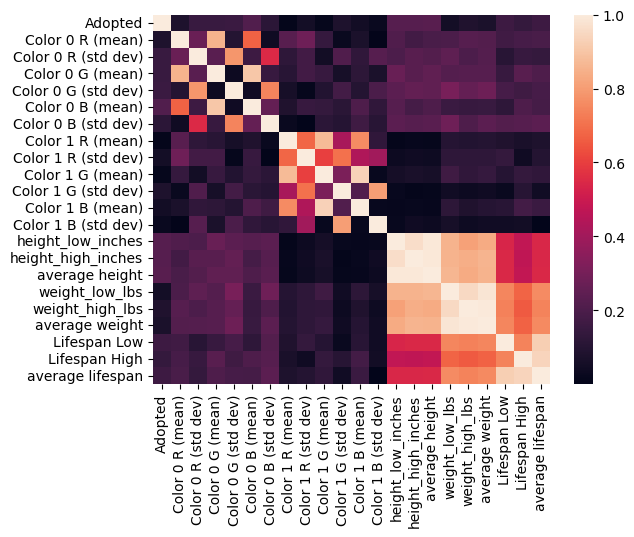

In [25]:
df_breeds_corr = df_breeds.corr()
sns.heatmap(data=df_breeds_corr.abs())

def score(df, var1, var2):
    print(f'Corr({var1}, {var2}) ≈ {df[var1][var2]}')

score(df_breeds_corr, 'Adopted', 'Color 0 B (mean)')
score(df_breeds_corr, 'Adopted', 'average height')
score(df_breeds_corr, 'Adopted', 'height_low_inches')
score(df_breeds_corr, 'Adopted', 'height_high_inches')
score(df_breeds_corr, 'Adopted', 'Lifespan Low')

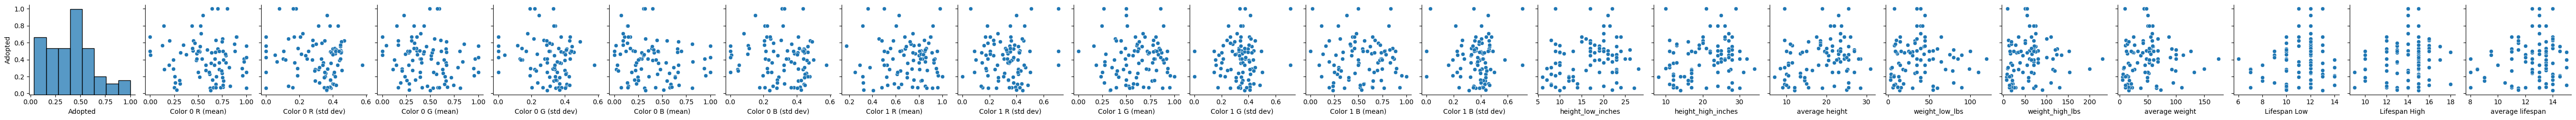

In [26]:
sns.pairplot(data=df_breeds, y_vars=['Adopted'])

## Height ~ adopted?

Is the average height of a breed correlated with its likelihood of being adopted? The Pearson correlation coefficient was Corr(Adopted, average height) ≈ 0.2286839421877296.

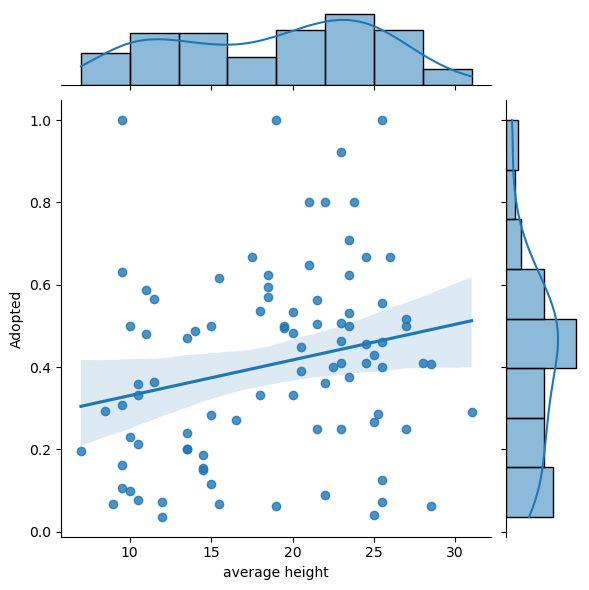

In [27]:
sns.jointplot(
    x=df_breeds['average height'].astype(dtype=float),
    y=df_breeds.Adopted.astype(dtype=float),
    kind='reg')

# Analysis by individuals

## Breed characteristics

This analysis considers individual animals and looks for correlations between characteristics of their breed and their outcome

~~whether or not the individual animal got adopted. (In the last section, we just analyzed average adoption rates per breed.)~~

It looks like the animals belonging to a breed with an average height around 20-25 \(inches?\) are more likely to be adopted than others, and animals between 5-12 inches are less likely than others to be adopted.

**TODO:** interpret the other graphs. Why are the different lifespan variables distributed the way they are, and why are they distributed differently compared to each other?

**TODO:** estimate years remaining in animals life from the breeds dataset and consider this variable also here.

average height ~ Adopted


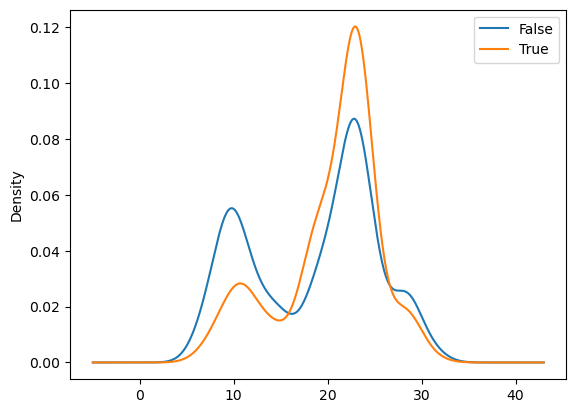

average lifespan ~ Adopted


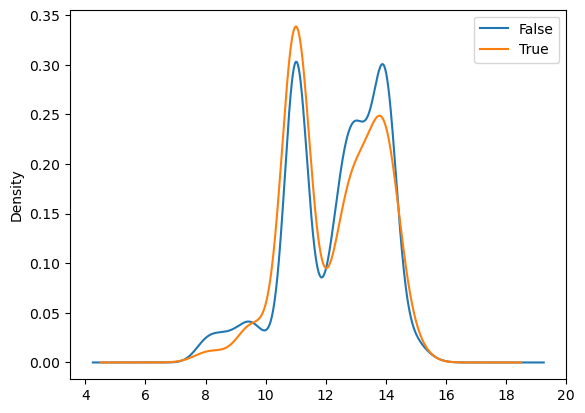

Lifespan Low ~ Adopted


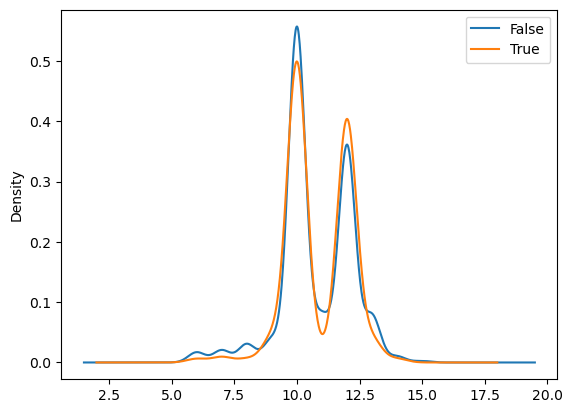

Lifespan High ~ Adopted


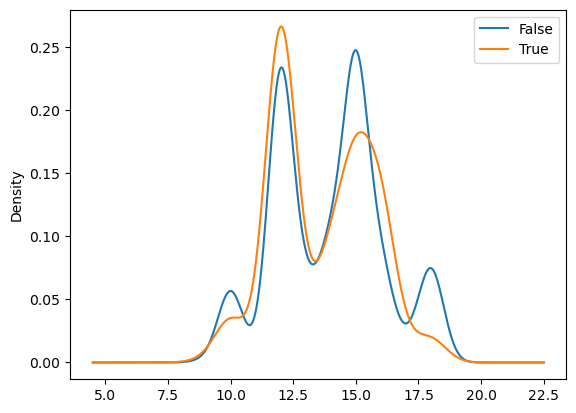

average height ~ Outcome Type


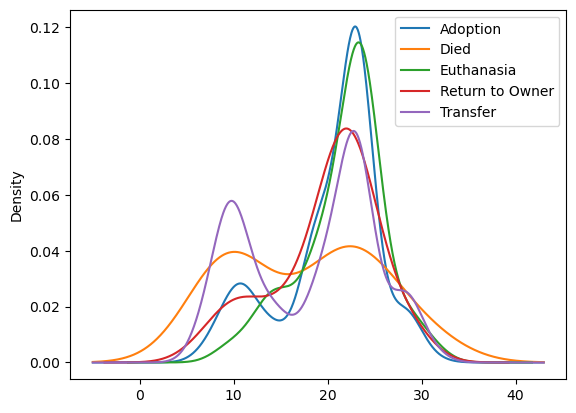

average lifespan ~ Outcome Type


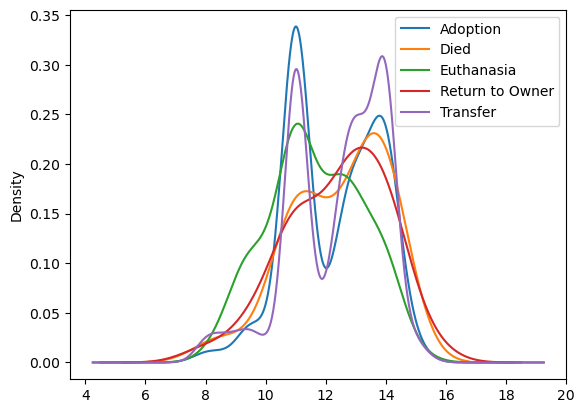

Lifespan Low ~ Outcome Type


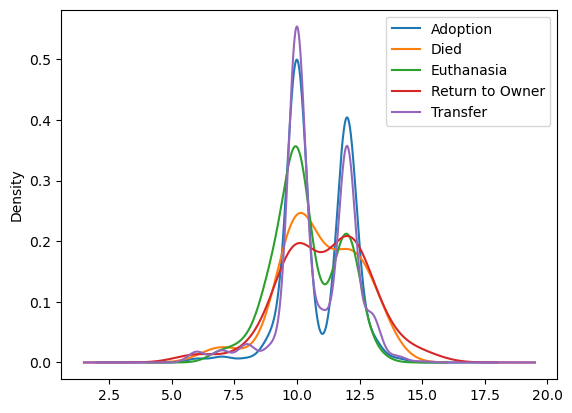

Lifespan High ~ Outcome Type


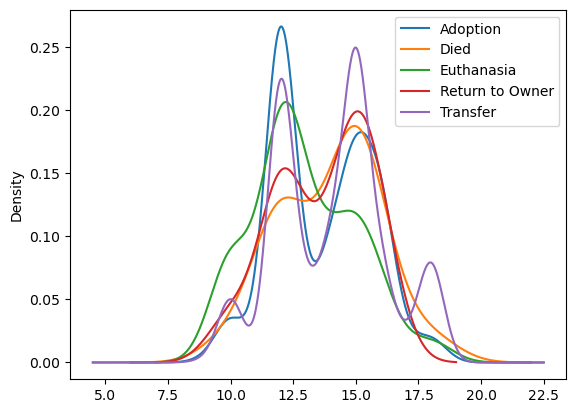

In [60]:
def kde(df, independent, dependent):
    print(f'{independent} ~ {dependent}')
    df[[dependent, independent]].groupby(dependent)[independent].plot.kde(legend=True)
    plt.show()
    
for dependent in ['Adopted', 'Outcome Type']:
    for independent in ['average height', 'average lifespan', 'Lifespan Low', 'Lifespan High']:
        kde(df_out_with_breeds_info, independent, dependent)

## Name

This section will attempt to look for correlations between the name of animals and their outcome.

In [ ]:
# %pip install tensorflow
# %pip install tensorflow_hub